# Solutions to Problem Sheet 7 - Q1

In this first question, we consider the function $u(x) = \sin(x)$, $0\le x\le 2\pi$. We wish to approximate its first and second order derivatives at the nodes/grid points $x_i = i \Delta x$ with $\Delta x = 2 \pi/N$, where $N$ is the number of discretization points. To do so, we will use four different schemes: 
* Forward finite differences (1st order)
* Backward finite differences (1st order) 
* Central finite differences (2nd order) 
* Central finite differences (4th order)

**Note**: when your grid points are close to the boundary points $x = 0$ and $x = 2\pi$, the formula for the derivative may take you outside of the domain. To solve this problem, we will use the periodicity of the sine function, i.e. the fact that $\sin(x+2\pi) = \sin(x)$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 100

font = {'size'   : 14}
matplotlib.rc('font', **font)

# Finite difference schemes
---

## (i) Forward finite differences
---

The forward finite difference scheme approximates the expression of the first derivative using the following expression: 
$$
u'(x_i) \approx \frac{u_{i+1} - u_{i}}{\Delta x}
$$
while the second order derivative is approximated using 
$$
u''(x_i) \approx \frac{u_{i+2} - 2 u_{i+1} + u_{i}}{(\Delta x)^2}
$$

The following function defines the right differentiation matrices. 

In [2]:
def forward_finite_diff(L,N):
    # Forward finite differences (1st order)
    # This function takes as input: 
    # - L: the domain size
    # - N: the number of grid points
    # It returns
    # - x: location of the grid points
    # - Dx: differentiation matrix for first-order derivative 
    # - D2x: differentiation matrix for first-order derivative 
    
    x = np.linspace(0,L,N+1)
    dx = L/N
    
    d1 = np.diag(-1*np.ones(N  ),0)
    d2 = np.diag(   np.ones(N-1),1)
    Dx = d1 + d2
    Dx[-1,0] = 1
    Dx = Dx/dx
    
    d1 = np.diag(   np.ones(N  ),0)
    d2 = np.diag(-2*np.ones(N-1),1)    
    d3 = np.diag(   np.ones(N-2),2)
    D2x = d1 + d2 + d3
    D2x[-1,0] = -2
    D2x[-1,1] =  1
    D2x[-2,0] =  1
    D2x = D2x/dx**2
    
    return x, Dx, D2x

To make sure that you understand well the structure of the differentiation matrices, you may want to generate them for a low number of grid points $N$ and print the actual matrix. Now that we have defined the function that will produce our differentiation matrices, we can test it and compare its output to the exact derivatives of $\sin(x)$. 

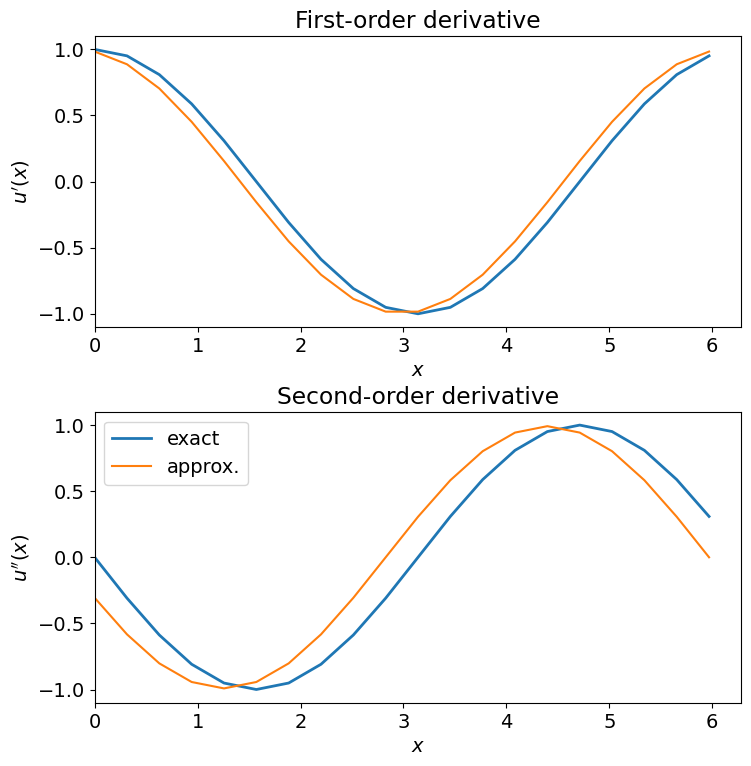

In [3]:
# Domain size and number of grid points
L = 2*np.pi
N = 20

# Compute the differentiation matrices
x,Dx,D2x = forward_finite_diff(L,N)

# Reference function and exact derivatives
y = np.sin(x[0:-1])
dy = np.cos(x[0:-1])
ddy = -np.sin(x[0:-1])

# Define the approximate derivatives 
fd_dy = np.matmul(Dx,y)
fd_ddy = np.matmul(D2x,y)

# Show result of finite differentiation along with exact derivatives 
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=2.5)

ax1.set_title('First-order derivative')
ax1_l1, = ax1.plot(x[0:-1], dy, lw=2, label='exact')
ax1_l2, = ax1.plot(x[0:-1], fd_dy, label='approx.')

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$u^\prime(x)$')
ax1.set_xlim([0, 2*np.pi])

plt.legend(handles=[ax1_l1, ax1_l2], loc='best')

ax2.set_title('Second-order derivative')
ax2.plot(x[0:-1], ddy, lw=2)
ax2.plot(x[0:-1], fd_ddy)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$u^{\prime\prime}(x)$')
ax2.set_xlim([0, 2*np.pi])

plt.show()

## (ii) Backward finite differences
---

The backward finite difference scheme approximates the expression of the first derivative using the following expression: 
$$
u'(x_i) \approx \frac{u_{i} - u_{i-1}}{\Delta x}
$$
while the second order derivative is approximated using 
$$
u''(x_i) \approx \frac{u_{i} - 2 u_{i-1} + u_{i-2}}{(\Delta x)^2}
$$

The following function defines backward differentiation matrices. 

In [4]:
def backward_finite_diff(L,N):
    # Backward finite differences (1st order)
    # This function takes as input: 
    # - L: the domain size
    # - N: the number of grid points
    # It returns
    # - x: location of the grid points
    # - Dx: differentiation matrix for first-order derivative 
    # - D2x: differentiation matrix for first-order derivative 
    
    x = np.linspace(0,L,N+1)
    dx = L/N
    
    d1 = np.diag(   np.ones(N  ), 0)
    d2 = np.diag(-1*np.ones(N-1),-1)
    Dx = d1 + d2
    Dx[0,-1] = -1
    Dx = Dx/dx
    
    d1 = np.diag(   np.ones(N  ), 0)
    d2 = np.diag(-2*np.ones(N-1),-1)    
    d3 = np.diag(   np.ones(N-2),-2)
    D2x = d1 + d2 + d3
    D2x[0,-1] = -2
    D2x[0,-2] =  1
    D2x[1,-1] =  1
    D2x = D2x/dx**2
    
    return x, Dx, D2x

Now that we have defined the function that will produce our differentiation matrices, we can test it and compare its output to the exact derivatives of $\sin(x)$. You can try running the following code with different numbers of grid points $N$ to see visually how the approximation gets better as $N$ increases.

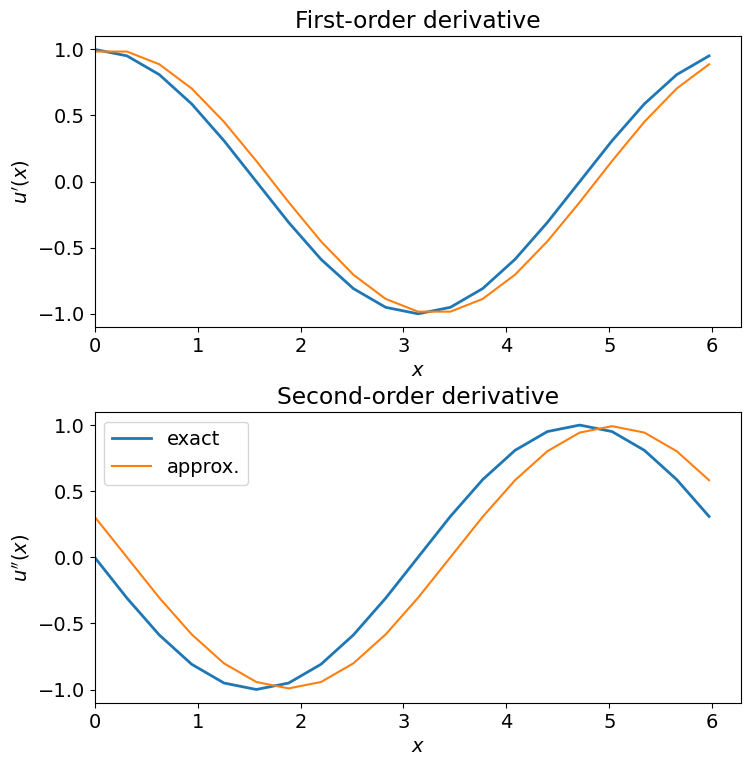

In [5]:
# Domain size and number of grid points
L = 2*np.pi
N = 20

# Compute the differentiation matrices
x,Dx,D2x = backward_finite_diff(L,N)

# Reference function and exact derivatives
y = np.sin(x[0:-1])
dy = np.cos(x[0:-1])
ddy = -np.sin(x[0:-1])

# Define the approximate derivatives 
fd_dy = np.matmul(Dx,y)
fd_ddy = np.matmul(D2x,y)

# Show result of finite differentiation along with exact derivatives 
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=2.5)

ax1.set_title('First-order derivative')
ax1_l1, = ax1.plot(x[0:-1], dy, lw=2, label='exact')
ax1_l2, = ax1.plot(x[0:-1], fd_dy, label='approx.')

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$u^\prime(x)$')
ax1.set_xlim([0, 2*np.pi])

plt.legend(handles=[ax1_l1, ax1_l2], loc='best')

ax2.set_title('Second-order derivative')
ax2.plot(x[0:-1], ddy, lw=2)
ax2.plot(x[0:-1], fd_ddy)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$u^{\prime\prime}(x)$')
ax2.set_xlim([0, 2*np.pi])

plt.show()

## (iii) Central finite differences (2nd order)
---

The central finite difference scheme approximates the expression of the first derivative using the following expression: 
$$
u'(x_i) \approx \frac{u_{i+1} - u_{i-1}}{\Delta x}
$$
while the second order derivative is approximated using 
$$
u''(x_i) \approx \frac{u_{i+1} - 2 u_{i} + u_{i-1}}{(\Delta x)^2}
$$

The following function defines central differentiation matrices. 

In [6]:
def central_finite_diff_2(L,N):
    # Central finite differences (2nd order)
    # This function takes as input: 
    # - L: the domain size
    # - N: the number of grid points
    # It returns
    # - x: location of the grid points
    # - Dx: differentiation matrix for first-order derivative 
    # - D2x: differentiation matrix for first-order derivative 
    
    x = np.linspace(0,L,N+1)
    dx = L/N
    
    d1 = np.diag(   np.ones(N-1), 1)
    d2 = np.diag(-1*np.ones(N-1),-1)
    Dx = d1 + d2
    Dx[0,-1] = -1
    Dx[-1,0] =  1
    Dx = Dx/(2*dx)
    
    d1 = np.diag(   np.ones(N-1),-1)
    d2 = np.diag(-2*np.ones(N  ), 0)    
    d3 = np.diag(   np.ones(N-1), 1)
    D2x = d1 + d2 + d3
    D2x[0,-1] = 1
    D2x[-1,0] = 1
    D2x = D2x/dx**2
    
    return x, Dx, D2x

Now that we have defined the function that will produce our differentiation matrices, we can test it and compare its output to the exact derivatives of $\sin(x)$. 

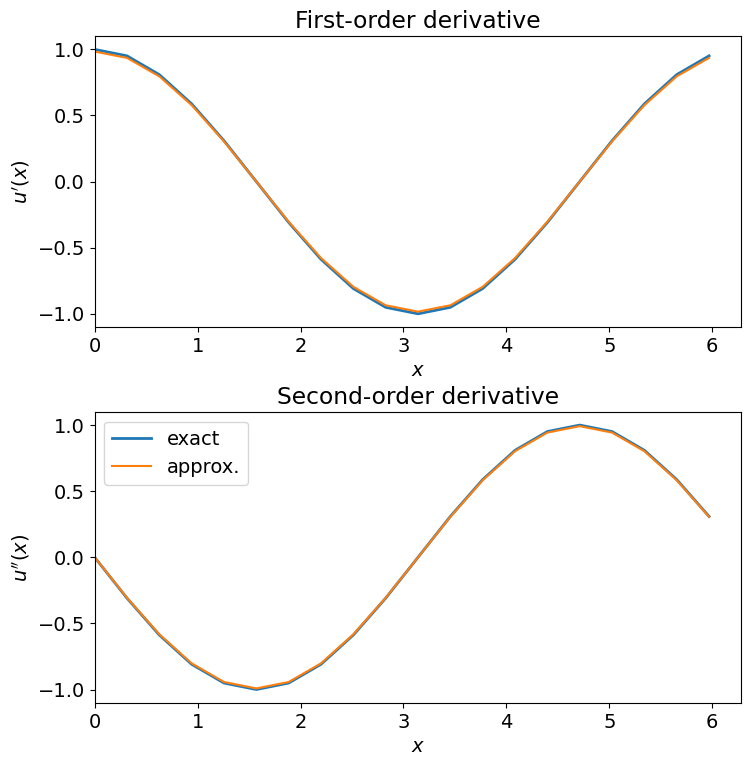

In [7]:
# Domain size and number of grid points
L = 2*np.pi
N = 20

# Compute the differentiation matrices
x,Dx,D2x = central_finite_diff_2(L,N)

# Reference function and exact derivatives
y = np.sin(x[0:-1])
dy = np.cos(x[0:-1])
ddy = -np.sin(x[0:-1])

# Define the approximate derivatives 
fd_dy = np.matmul(Dx,y)
fd_ddy = np.matmul(D2x,y)

# Show result of finite differentiation along with exact derivatives 
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=2.5)

ax1.set_title('First-order derivative')
ax1_l1, = ax1.plot(x[0:-1], dy, lw=2, label='exact')
ax1_l2, = ax1.plot(x[0:-1], fd_dy, label='approx.')

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$u^\prime(x)$')
ax1.set_xlim([0, 2*np.pi])

plt.legend(handles=[ax1_l1, ax1_l2], loc='best')

ax2.set_title('Second-order derivative')
ax2.plot(x[0:-1], ddy, lw=2)
ax2.plot(x[0:-1], fd_ddy)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$u^{\prime\prime}(x)$')
ax2.set_xlim([0, 2*np.pi])

plt.show()

## (iv) Central finite differences (4th order)
---

The central finite difference scheme approximates the expression of the first derivative using the following expression: 
$$
u'(x_i) \approx \frac{1}{\Delta x} \left(-\frac{1}{12}u_{i+2} + \frac{2}{3}u_{i+1} -\frac{2}{3}u_{i-1} + \frac{1}{12}u_{i-2}  \right)
$$
while the second order derivative is approximated using 
$$
u''(x_i) \approx \frac{1}{(\Delta x)^2}\left(-\frac{1}{12}u_{i+2} + \frac{4}{3}u_{i+1} - \frac{5}{2}u_{i} + \frac{4}{3}u_{i-1} - \frac{1}{12}u_{i-2}  \right)
$$

The following function defines differentiation matrices. 

In [8]:
def central_finite_diff_4(L,N):
    # Central finite differences (4th order)
    # This function takes as input: 
    # - L: the domain size
    # - N: the number of grid points
    # It returns
    # - x: location of the grid points
    # - Dx: differentiation matrix for first-order derivative 
    # - D2x: differentiation matrix for first-order derivative 
    
    x = np.linspace(0,L,N+1)
    dx = L/N
    
    d1 = np.diag( (1/12)*np.ones(N-2),-2)
    d2 = np.diag( -(2/3)*np.ones(N-1),-1)
    d3 = np.diag(  (2/3)*np.ones(N-1), 1)
    d4 = np.diag(-(1/12)*np.ones(N-2), 2)
    Dx = d1 + d2 + d3 + d4
    Dx[0,-2] = 1/12
    Dx[0,-1] = -2/3
    Dx[1,-1] = 1/12
    Dx[-2,0] = -1/12
    Dx[-1,0] = 2/3
    Dx[-1,1] = -1/12
    Dx = Dx/dx
    
    d1 = np.diag(-(1/12)*np.ones(N-2),-2)
    d2 = np.diag(  (4/3)*np.ones(N-1),-1)    
    d3 = np.diag( -(5/2)*np.ones(N  ), 0)
    d4 = np.diag(  (4/3)*np.ones(N-1), 1)
    d5 = np.diag(-(1/12)*np.ones(N-2), 2)
    D2x = d1 + d2 + d3 + d4 + d5
    D2x[0,-2] = -1/12
    D2x[0,-1] = 4/3
    D2x[1,-1] = -1/12
    D2x[-2,0] = -1/12
    D2x[-1,0] = 4/3
    D2x[-1,1] = -1/12
    D2x = D2x/dx**2
    
    return x, Dx, D2x

Now that we have defined the function that will produce our differentiation matrices, we can test it and compare its output to the exact derivatives of $\sin(x)$. 

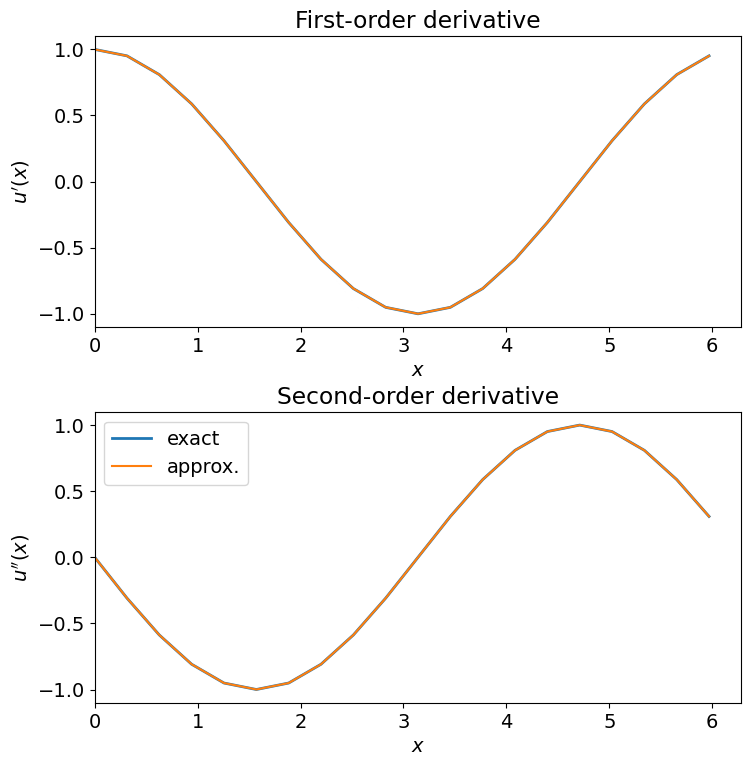

In [9]:
# Domain size and number of grid points
L = 2*np.pi
N = 20

# Compute the differentiation matrices
x,Dx,D2x = central_finite_diff_4(L,N)

# Reference function and exact derivatives
y = np.sin(x[0:-1])
dy = np.cos(x[0:-1])
ddy = -np.sin(x[0:-1])

# Define the approximate derivatives 
fd_dy = np.matmul(Dx,y)
fd_ddy = np.matmul(D2x,y)

# Show result of finite differentiation along with exact derivatives 
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=2.5)

ax1.set_title('First-order derivative')
ax1_l1, = ax1.plot(x[0:-1], dy, lw=2, label='exact')
ax1_l2, = ax1.plot(x[0:-1], fd_dy, label='approx.')

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$u^\prime(x)$')
ax1.set_xlim([0, 2*np.pi])

plt.legend(handles=[ax1_l1, ax1_l2], loc='best')

ax2.set_title('Second-order derivative')
ax2.plot(x[0:-1], ddy, lw=2)
ax2.plot(x[0:-1], fd_ddy)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$u^{\prime\prime}(x)$')
ax2.set_xlim([0, 2*np.pi])

plt.show()

# Checking the order of accuracy of the FD schemes
---

As shown on the above figures, it is obvious that centered finite difference seem to be doing a better job at approximating the derivatives already for a fixed number of grid points. Now the second part of this problem asks you to check the order of accuracy of the schemes. To do so, we want produce a log-log plot of the error $E(\Delta x)$ made in approximating the first-order derivative. Remember that the global error is defined as 
$$
E(t) \equiv \Delta x \sum_{i=0}^{M-1} T_i(\Delta x) 
$$
where $T_i(\Delta x)$ is the truncation error made in approximating the derivative at grid point $x_i$ for the scheme under study. Here, we will test the four numerical schemes for the first-derivative of $f(x) = \sin(x)$, i.e. $f'(x) = \cos(x)$ over a large range of grid spacing.

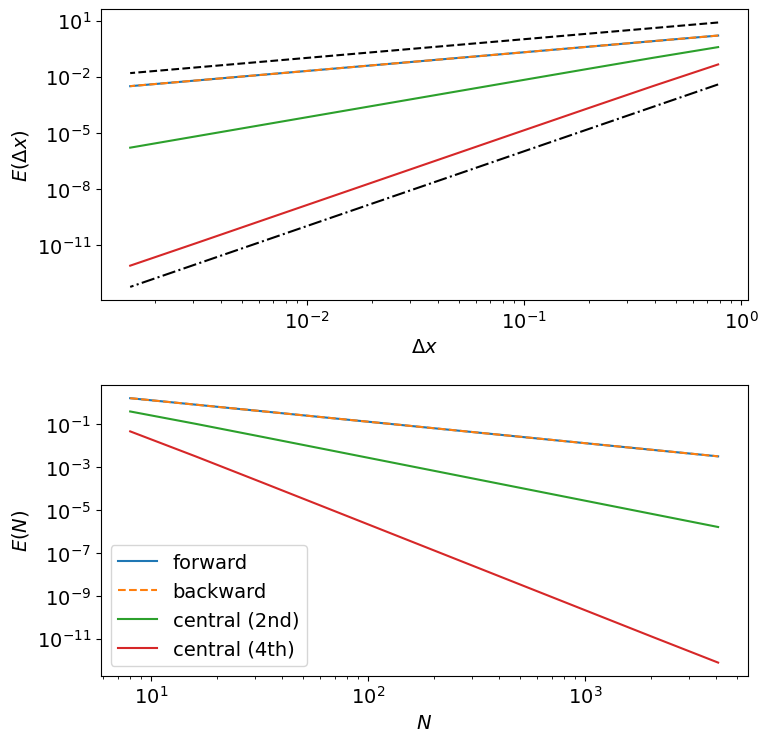

In [10]:
# Domain size and number of grid points tested
L = 2*np.pi
Ns = np.array([8,16,32,64,128,256,512,1024,2048,4096])

# Preallocate the array in which we will store the errors
E = np.zeros((len(Ns),4))

# Loop over the number of grid points
for n in range(len(Ns)):
    N = Ns[n]
    
    x,fw_Dx,D2x = forward_finite_diff(L,N) # Forward finite difference differentiation matrix
    x,bw_Dx,D2x = backward_finite_diff(L,N) # Backward finite difference differentiation matrix
    x,c2_Dx,D2x = central_finite_diff_2(L,N) # Central finite difference differentiation matrix (2nd order)
    x,c4_Dx,D2x = central_finite_diff_4(L,N) # Central finite difference differentiation matrix (4th order)
    
    # Reference function and exact derivatives
    y = np.sin(x[0:-1])
    dy = np.cos(x[0:-1])
    
    # Define the approximate derivatives 
    fw_dy = np.matmul(fw_Dx,y)
    bw_dy = np.matmul(bw_Dx,y)
    c2_dy = np.matmul(c2_Dx,y)
    c4_dy = np.matmul(c4_Dx,y)
    
    dx = L/N
    # Compute the errors for each scheme
    E[n,0] = dx*np.sum(np.absolute(dy-fw_dy)) # Error made using forward differences
    E[n,1] = dx*np.sum(np.absolute(dy-bw_dy)) # Error made using backward differences
    E[n,2] = dx*np.sum(np.absolute(dy-c2_dy)) # Error made using central (2nd order) differences
    E[n,3] = dx*np.sum(np.absolute(dy-c4_dy)) # Error made using central (4th order) differences

# Show result of finite differentiation along with exact derivatives 
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=2.5)

dx = L/Ns
l1, = ax1.loglog(dx, E[:,0], label='forward')
l2, = ax1.loglog(dx, E[:,1],'--', label='backward')
l3, = ax1.loglog(dx, E[:,2], label='central (2nd)')
l4, = ax1.loglog(dx, E[:,3], label='central (4th)')

l5, = ax1.loglog(dx, 10*dx, 'k--')
l6, = ax1.loglog(dx, dx**4/100, 'k-.')

ax1.set_xlabel(r'$\Delta x$')
ax1.set_ylabel(r'$E(\Delta x)$')

plt.legend(handles=[l1, l2, l3, l4], loc='best')

ax2.loglog(Ns, E[:,0], label='forward')
ax2.loglog(Ns, E[:,1],'--', label='backward')
ax2.loglog(Ns, E[:,2], label='central (2nd)')
ax2.loglog(Ns, E[:,3], label='central (4th)')

ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'$E(N)$')

plt.show()

As can be seen on the figures above, we have checked that the error scales with $\Delta x^{\alpha}$, where $\alpha$ is the order of accuracy of the finite difference scheme. The dashed black line is here to guide the eye and is $\propto \Delta x$, while the dot-dashed black line is $\propto (\Delta x)^4$.